<a href="https://colab.research.google.com/github/putuguna29/Latihan/blob/main/UTS_DataAnalytics_Metode%20Klasifikasi%20Naive%20Bayes_GaussianNaiveBayes_I%20Putu%20Guna%20Wijaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB  

from sklearn import preprocessing            

from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
df1 =pd.read_csv('/content/Iris_Data.csv')

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df1.duplicated().sum()

3

In [ ]:
df1.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df1.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df1.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df1['species']=label_encoder.fit_transform(df1['species'])

df1['species'].unique()

array([0, 1, 2])

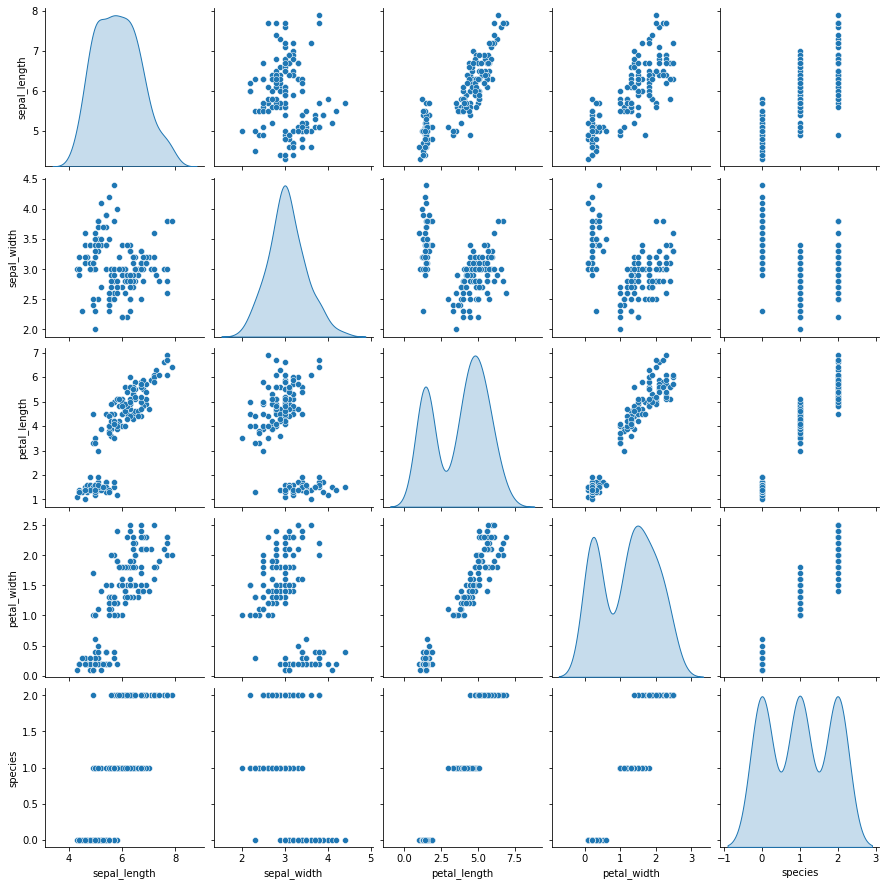

In [ ]:
sns.pairplot(df1, diag_kind='kde')

In [ ]:
df1.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
x = df1[['sepal_length','sepal_width','petal_length','petal_width']]
y= df1['species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

x_train.shape

(105, 4)

In [ ]:
Naive_bayes = GaussianNB()

Naive_bayes.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = Naive_bayes.predict(x_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
from sklearn import metrics

cnf_metrics = metrics.confusion_matrix(y_test,y_pred)
cnf_metrics

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

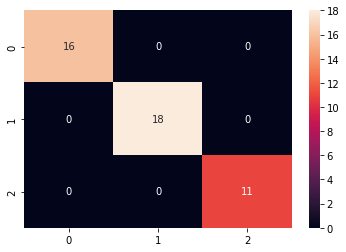

In [ ]:
sns.heatmap(cnf_metrics, annot=True)

In [ ]:
print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0
